### 0. Importing libraries/dataframe

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks

In [2]:
churndata = pd.read_csv('files_for_lab/Customer-Churn.csv')
churndata

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
# column name standardisation
cols = [col.lower().replace(" ", "_") for col in churndata.columns]
churndata.columns = cols

### 1. Checking datatypes, applying pd.to_numeric to totalcharges

In [4]:
# checking datatypes of features
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7043 non-null   object 
 15  churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

The dataframe has no null values and the only wrongly read datatype seems to be that of totalcharges.

pd.to_numeric function is unable to handle white spaces. Checking for white spaces in the column we have:

In [5]:
len(churndata['totalcharges'].loc[churndata['totalcharges'] == " "])

11

In [6]:
churndata[churndata['totalcharges'] == ' ']

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
488,Female,0,Yes,Yes,0,No,Yes,No,Yes,Yes,Yes,No,Two year,52.55,,No
753,Male,0,No,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.25,,No
936,Female,0,Yes,Yes,0,Yes,Yes,Yes,Yes,No,Yes,Yes,Two year,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.75,,No
1340,Female,0,Yes,Yes,0,No,Yes,Yes,Yes,Yes,Yes,No,Two year,56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,Two year,73.35,,No


In [7]:
churndata.churn.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
print('Percentage of customer churn in set:', round(len(churndata[churndata['churn'] == 'Yes'])/len(churndata),2)*100, '%')

Percentage of customer churn in set: 27.0 %


All of the 11 records with white spaces in totalcharges have "No" in churn (the target value). They belong to the 63 % of 7043 records that are still with the company. However, there might be a way to avoid dropping the rows.

In [9]:
churndata[churndata['totalcharges'] == '0']

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn


Since there are no records of totalcharges == 0, these 11 customers could be new customers, thereby not having a total sum they have been charged yet. Unfortunately this is not possible to find out just by looking at the data at hand. Howeber, their totalcharges could be filled at least temporarily with 0 and if further details come to light adjusted accordingly.

In [10]:
# function to clean totalcharges
def clean_totalcharges(x):
    if x == ' ':
        return '0'  # since all values are strings and will be turned to numeric in the next steps
    else:
        return x

churndata['totalcharges'] = churndata['totalcharges'].apply(lambda x : clean_totalcharges(x))

Now pd.to_numeric can finally be used

In [11]:
churndata['totalcharges'] = pd.to_numeric(churndata['totalcharges'])

In [12]:
# confirming
churndata['totalcharges'].dtypes

dtype('float64')

### 2. Features `tenure`, `senioricitizen`, `monthlycharges` and `totalcharges`

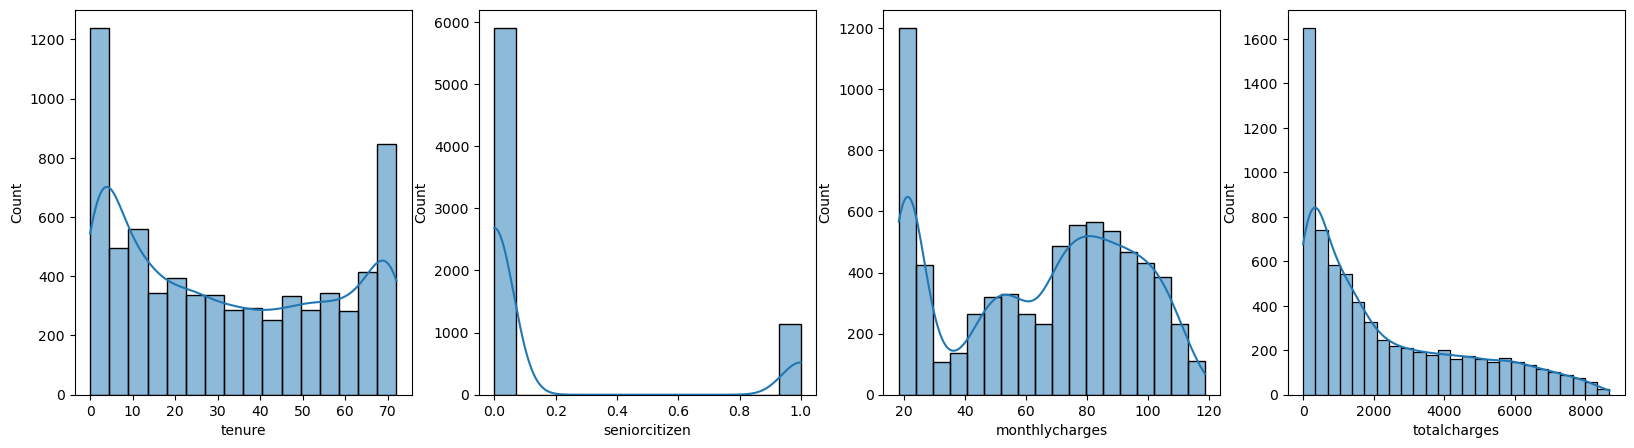

In [13]:
# since these features will be transformed and used for the logistic regression task, a better idea of their distributions will be beneficial
feats_to_scale = ['tenure', 'seniorcitizen', 'monthlycharges', 'totalcharges']
plt.rcParams['figure.figsize'] = (20, 5)


for n, col_name in enumerate(feats_to_scale):
    # adding new subplot only if needed with each iteration
    ax = plt.subplot(1, 4, n+1)
    sns.histplot(churndata[col_name], kde = True, ax = ax)

In [14]:
# applying StandardScaler
scaler = StandardScaler()

for col_name in feats_to_scale:
    # seniorcitizen is a dummy variable. There is no need for standardisation
    if col_name != 'seniorcitizen':
        scaler.fit(churndata[[col_name]])
        churndata[[col_name]] = scaler.transform(churndata[[col_name]])
    else:
        pass

In [15]:
churndata

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,-1.277445,No,No,Yes,No,No,No,No,Month-to-month,-1.160323,-0.992611,No
1,Male,0,No,No,0.066327,Yes,Yes,No,Yes,No,No,No,One year,-0.259629,-0.172165,No
2,Male,0,No,No,-1.236724,Yes,Yes,Yes,No,No,No,No,Month-to-month,-0.362660,-0.958066,Yes
3,Male,0,No,No,0.514251,No,Yes,No,Yes,Yes,No,No,One year,-0.746535,-0.193672,No
4,Female,0,No,No,-1.236724,Yes,No,No,No,No,No,No,Month-to-month,0.197365,-0.938874,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,-0.340876,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,0.665992,-0.127605,No
7039,Female,0,Yes,Yes,1.613701,Yes,No,Yes,Yes,No,Yes,Yes,One year,1.277533,2.242606,No
7040,Female,0,Yes,Yes,-0.870241,No,Yes,No,No,No,No,No,Month-to-month,-1.168632,-0.852932,No
7041,Male,1,Yes,No,-1.155283,Yes,No,No,No,No,No,No,Month-to-month,0.320338,-0.870513,Yes


In [16]:
# X/y split
subset = churndata[feats_to_scale]
X = subset
y = churndata['churn']

In [17]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [18]:
# fitting logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

In [19]:
# checking accuracy
round(log_model.score(X_test, y_test), 2)

0.78

In [20]:
# taking a more careful look into how this score was achieved
print(classification_report(y_test, log_preds))

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1299
         Yes       0.60      0.48      0.54       462

    accuracy                           0.78      1761
   macro avg       0.72      0.69      0.70      1761
weighted avg       0.77      0.78      0.77      1761



The predictive accuracy of the model is 78%, but it is biased in favor of "No" class.

## 3. Managing imbalance in the dataset

In [21]:
# checking value counts
for col_name in churndata.columns:
    print(col_name, '\n', churndata[col_name].value_counts())

gender 
 Male      3555
Female    3488
Name: gender, dtype: int64
seniorcitizen 
 0    5901
1    1142
Name: seniorcitizen, dtype: int64
partner 
 No     3641
Yes    3402
Name: partner, dtype: int64
dependents 
 No     4933
Yes    2110
Name: dependents, dtype: int64
tenure 
 -1.277445    613
 1.613701    362
-1.236724    238
-1.196004    200
-1.155283    176
            ... 
-0.177995     57
 0.269929     56
 0.473531     51
 0.147768     50
-1.318165     11
Name: tenure, Length: 73, dtype: int64
phoneservice 
 Yes    6361
No      682
Name: phoneservice, dtype: int64
onlinesecurity 
 No                     3498
Yes                    2019
No internet service    1526
Name: onlinesecurity, dtype: int64
onlinebackup 
 No                     3088
Yes                    2429
No internet service    1526
Name: onlinebackup, dtype: int64
deviceprotection 
 No                     3095
Yes                    2422
No internet service    1526
Name: deviceprotection, dtype: int64
techsupport 
 No   

The target feature  `churn`  has 5174 "No" and 1869 "Yes". The data is imbalanced.

<br>It would stand to reason to assume that the best course of action would be upsampling the under-represented class since the dataset is relatively small, as more data mean more safety when they are of good quality. However, it is worth examining how each method affects the predictive capabilities of the logistic regression model.

<br>To that end, a series of upsampling and downsampling methods discussed in class will be applied in order to see what would be the best course of action were we to use the subset to predict churn.

<br>`phoneservice` and `seniorcitizen` also bear obvious imbalances, but will be left as they are, since they will be used to train the model and not to make predictions upon.

### 3.1. Upsampling methods:

- #### SMOTE

In [22]:
# upsampling Yes
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

No     5174
Yes    5174
Name: churn, dtype: int64

In [23]:
# function to automate running the model and produce a heatmap of the confusion matrix
def run_log_reg(X, y, method):
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

    # defining/running the model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # classification report
    predictions = model.predict(X_test)
    accuracy_metrics = classification_report(y_test, predictions)

    # confusion matrix
    cm = metrics.confusion_matrix(y_test, predictions)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
    cm_display.plot()
    
    # printing report and confusion matrix
    print(method.upper())
    print(accuracy_metrics)
    plt.title(method.upper(), fontsize = 17)
    plt.show()

SMOTE
              precision    recall  f1-score   support

          No       0.74      0.72      0.73      1310
         Yes       0.72      0.74      0.73      1277

    accuracy                           0.73      2587
   macro avg       0.73      0.73      0.73      2587
weighted avg       0.73      0.73      0.73      2587



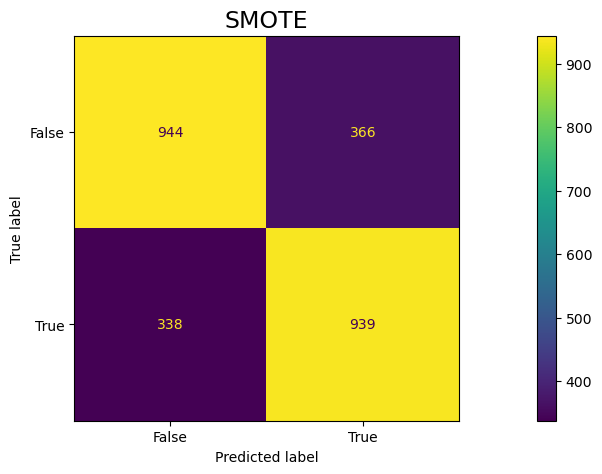

In [24]:
run_log_reg(X_sm, y_sm, "smote")

The accuracy score has decreased slightly, but the model's predictions are more reliable.

- ### Manual Upsampling

In [25]:
# merging subset and target column, so the changes affect the entire subset
subset = pd.concat([subset, y], axis = 1)
subset

,tenure,seniorcitizen,monthlycharges,totalcharges,churn
0,-1.277445,0,-1.160323,-0.992611,No
1,0.066327,0,-0.259629,-0.172165,No
2,-1.236724,0,-0.362660,-0.958066,Yes
3,0.514251,0,-0.746535,-0.193672,No
4,-1.236724,0,0.197365,-0.938874,Yes
...,...,...,...,...,...
7038,-0.340876,0,0.665992,-0.127605,No
7039,1.613701,0,1.277533,2.242606,No
7040,-0.870241,0,-1.168632,-0.852932,No
7041,-1.155283,1,0.320338,-0.870513,Yes


In [26]:
counts = subset['churn'].value_counts()

In [27]:
# increasing the number of rows with "Yes" in churn
yes = subset[subset['churn'] == 'Yes'].sample(counts[0], replace=True)
no = subset[subset['churn'] == 'No']
# concatenating subsets with equal numbers of "Yes" and "No" and shuffling the rows
man_upsam = pd.concat([yes, no], axis = 0)
man_upsam = man_upsam.sample(frac = 1)  # shuffling rows
man_upsam['churn'].value_counts()

No     5174
Yes    5174
Name: churn, dtype: int64

In [28]:
X_man_upsam = man_upsam.drop('churn', axis = 1)
y_man_upsam = man_upsam['churn']

MANUAL UPSAMPLING
              precision    recall  f1-score   support

          No       0.74      0.71      0.73      1287
         Yes       0.72      0.76      0.74      1300

    accuracy                           0.73      2587
   macro avg       0.73      0.73      0.73      2587
weighted avg       0.73      0.73      0.73      2587



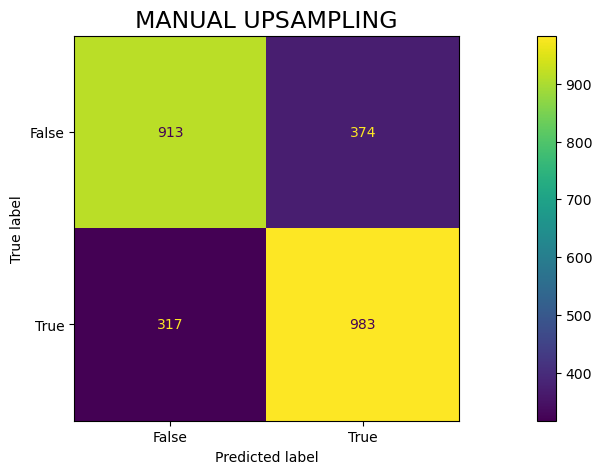

In [29]:
run_log_reg(X_man_upsam, y_man_upsam, "manual upsampling")

- ### RandomOverSampler

In [30]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)
y_ros.value_counts()

No     5174
Yes    5174
Name: churn, dtype: int64

RANDOMOVERSAMPLER
              precision    recall  f1-score   support

          No       0.76      0.71      0.73      1310
         Yes       0.72      0.77      0.74      1277

    accuracy                           0.74      2587
   macro avg       0.74      0.74      0.74      2587
weighted avg       0.74      0.74      0.74      2587



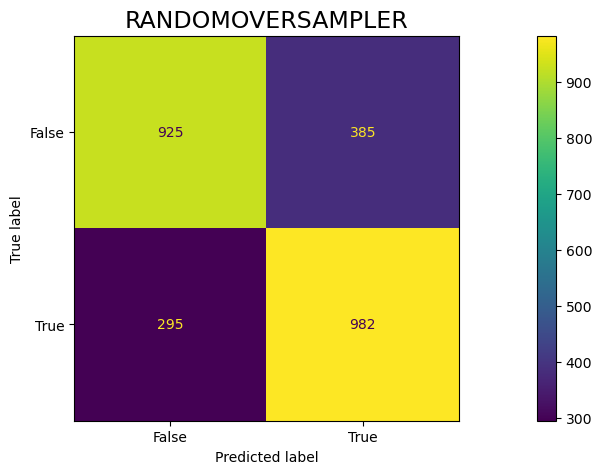

In [31]:
run_log_reg(X_ros, y_ros, "RandomOverSampler")

### 3.2. Applying undersampling techiques
- ### Manual Downsampling

In [32]:
counts2 = subset['churn'].value_counts()
counts2

No     5174
Yes    1869
Name: churn, dtype: int64

In [33]:
yes2 = subset[subset['churn'] == "Yes"]
no2 = subset[subset['churn'] == "No"].sample(counts[1], replace = True)
man_down = pd.concat([yes2, no2], axis = 0)
man_down = man_down.sample(frac = 1)
man_down['churn'].value_counts()

No     1869
Yes    1869
Name: churn, dtype: int64

In [34]:
X_man_down = man_down.drop('churn', axis = 1)
y_man_down = man_down['churn']

MANUAL DOWNSAMPLING
              precision    recall  f1-score   support

          No       0.73      0.71      0.72       449
         Yes       0.74      0.75      0.75       486

    accuracy                           0.73       935
   macro avg       0.73      0.73      0.73       935
weighted avg       0.73      0.73      0.73       935



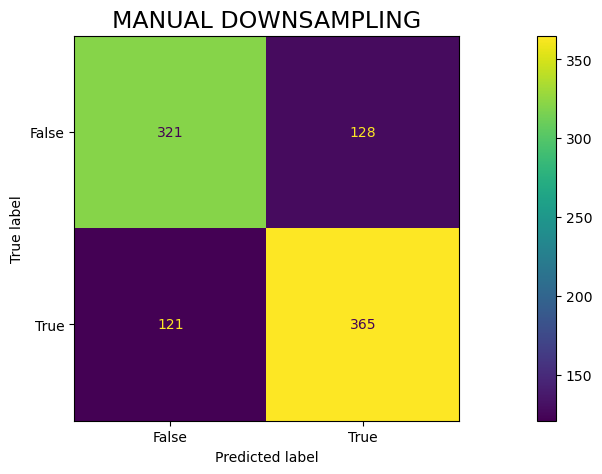

In [35]:
run_log_reg(X_man_down, y_man_down, "manual downsampling")

- ### RandomUnderSampler

In [36]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)
y_rus.value_counts()

No     1869
Yes    1869
Name: churn, dtype: int64

RANDOMUNDERSAMPLER
              precision    recall  f1-score   support

          No       0.74      0.73      0.73       466
         Yes       0.73      0.75      0.74       469

    accuracy                           0.74       935
   macro avg       0.74      0.74      0.74       935
weighted avg       0.74      0.74      0.74       935



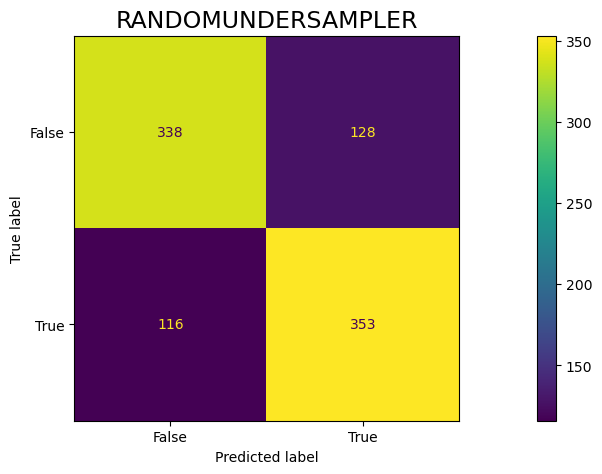

In [37]:
run_log_reg(X_rus, y_rus, "RandomUnderSampler")

- ### TomekLinks

In [38]:
tl = TomekLinks(sampling_strategy = 'majority')
X_tl, y_tl = tl.fit_resample(X,y)
y_tl.value_counts()

No     4667
Yes    1869
Name: churn, dtype: int64

TOMEKLINKS
              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1161
         Yes       0.68      0.51      0.58       473

    accuracy                           0.79      1634
   macro avg       0.75      0.70      0.72      1634
weighted avg       0.78      0.79      0.78      1634



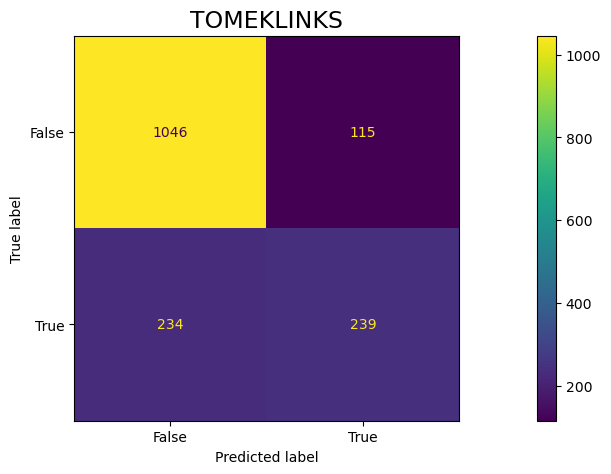

In [39]:
run_log_reg(X_tl, y_tl, "TomekLinks")

**In conclusion**, the highest accuracy overall is observed in the case of TomekLinks. However, the model in that case, as well as in the case of using the initial, imbalanced data, is biased and much better at predicting the "No" class. Manual upsampling and downsampling offered the best results in the end in terms of accuracy, with manual downsampling taking the lead in terms of relative precision and recall for the "No" class and f1-scores for both of them.

<br>Nonetheless, it is worth mentioning, that SMOTE, although slightly less efficient (both manual upsampling and downsampling gave accuracy scores of 0.74, while SMOTE gave 0.73), offers more consistency in terms of precision, recall and f1-scores, as the scores differ less for the respective classes. And since upsampling the data offers more information to work with, it seems to be the preferable method to deal with the imbalance in this dataset.